In [7]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
#check the physical devices present
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
#checking if the nvidia cuda for tensorflow is present
tf.test.is_built_with_cuda()

True

In [10]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


(50000, 32, 32, 3)

In [11]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
#Visualizing the images
def plot_sample(index):
  plt.figure(figsize=(2,1))
  plt.imshow(X_train[index])


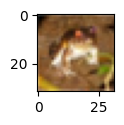

In [13]:
plot_sample(0)

In [14]:
y_train[0]

array([6], dtype=uint8)

In [15]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [16]:

y_train[3]

array([4], dtype=uint8)

In [17]:
classes[y_train[3][0]]

'deer'

In [18]:
#scale the images ,do not scale the output
X_train_scaled=X_train/255
X_test_scaled=X_test/255

X_train_scaled

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [19]:
#one hot encode the y_train from int to dummies then remember to use categorical_crossentropy instead of sparse_categorical_crossentropy
y_train_categorical=keras.utils.to_categorical(
    y_train,num_classes=10
)

In [27]:
y_test_categorical=keras.utils.to_categorical(
    y_test,num_classes=10
)

In [20]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [21]:
from keras import Sequential,layers,Input

model=Sequential([
    Input(shape=(32,32,3)),
    layers.Flatten(),
    layers.Dense(3000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
#switch from cpu to gpu to increase speed
model.fit(X_train_scaled,y_train_categorical,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7004 - loss: 0.8779
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7063 - loss: 0.8627
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7119 - loss: 0.8480
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7154 - loss: 0.8428
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7262 - loss: 0.8200
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7280 - loss: 0.8031
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7306 - loss: 0.8003
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7390 - loss: 0.7790
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7361 - loss: 0.7739
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7432 - loss: 0.7637


In [28]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5381 - loss: 1.3762


[1.378510594367981, 0.5350000262260437]

In [31]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


np.int64(3)

In [33]:
classes[y_test[0][0]]

'cat'